# Gradient Descent for a simple linear regression problem

Most of this code comes from an excelent tutorial by Josh Gordon, available in YouTube (https://www.youtube.com/watch?v=eysk3Keduxk)

It shows automatic differentiation in the context of a simple problem

### Import PyTorch, MatPlotLib and Keras

In [56]:
import torch
import matplotlib.pyplot as plt

### Create noisy data

In [57]:
def make_noisy_data(m=0.1, b=0.3, n=100):
  x = torch.rand(100)
  noise = torch.normal(mean=0.0, std=0.01, size=(1,100))
  y = m * x + b + noise
  return x, y


In [58]:
x_train, y_train = make_noisy_data()

In [59]:
print(x_train)
print(y_train)

tensor([0.9075, 0.8199, 0.9201, 0.1166, 0.1644, 0.7379, 0.0333, 0.9942, 0.6064,
        0.5646, 0.0724, 0.6593, 0.7150, 0.5793, 0.9809, 0.6502, 0.0566, 0.9201,
        0.6698, 0.2615, 0.0407, 0.7850, 0.9752, 0.0903, 0.5273, 0.6794, 0.2639,
        0.3906, 0.1661, 0.2636, 0.0442, 0.4884, 0.7965, 0.7432, 0.9697, 0.0609,
        0.4385, 0.9868, 0.5819, 0.3590, 0.0497, 0.7327, 0.8796, 0.9009, 0.9186,
        0.5979, 0.8564, 0.3741, 0.9061, 0.4572, 0.3969, 0.2515, 0.7662, 0.7023,
        0.8180, 0.1805, 0.2342, 0.9732, 0.2225, 0.2148, 0.3662, 0.3384, 0.1600,
        0.9041, 0.5557, 0.7280, 0.8709, 0.1760, 0.8817, 0.2495, 0.4204, 0.8784,
        0.9610, 0.9389, 0.7876, 0.9647, 0.3198, 0.4682, 0.3290, 0.4633, 0.4392,
        0.7671, 0.8437, 0.1399, 0.2239, 0.3462, 0.5668, 0.3059, 0.1890, 0.4087,
        0.2560, 0.5138, 0.1299, 0.3750, 0.3155, 0.4309, 0.8929, 0.8279, 0.3386,
        0.0416])
tensor([[0.3884, 0.3864, 0.4029, 0.3036, 0.3158, 0.3821, 0.3146, 0.3901, 0.3657,
         0.3542, 0.308

### Show Data points

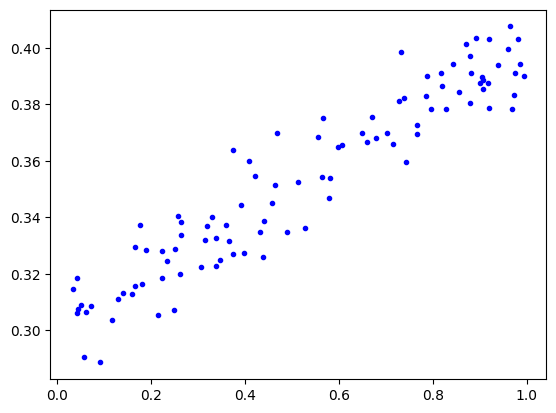

In [60]:
plt.plot(x_train, y_train[0], 'b.')

### Initialize m and b with random values

In [61]:
torch.manual_seed(5)
m = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

print(m,b)

tensor([0.8303], requires_grad=True) tensor([0.1261], requires_grad=True)


### The model

In [62]:
def predict(x):
  y = m * x + b
  return y

In [63]:
print(predict(1))

tensor([0.9564], grad_fn=<AddBackward0>)


## What the model knows before being trained

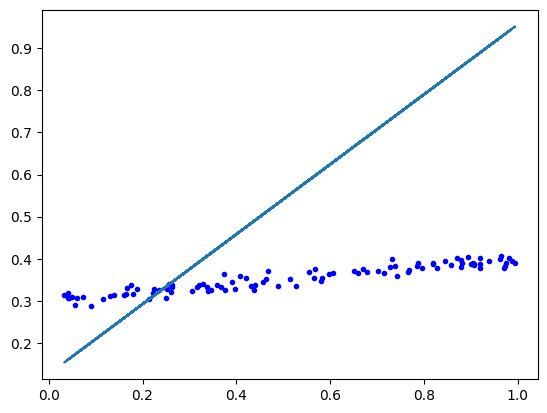

In [64]:
plt.plot(x_train, y_train[0], 'b.')
plt.plot(x_train, predict(x_train).detach().numpy())

### The loss function

In [65]:
def squared_error(y_pred, y_true):
    return torch.mean(torch.square(y_pred - y_true))

In [66]:
loss = squared_error(predict(x_train), y_train)
print("Starting loss: ", loss.detach().numpy())

Starting loss:  0.09264878


# Learning
Use gradient descent to gradually improve our guess of m and b

In [77]:
learning_rate = 0.05
epochs = 800

for i in range(epochs):

    
    predictions = predict(x_train)
    loss = squared_error(predictions, y_train[0])
    loss.backward()

    with torch.no_grad():
        m -= m.grad * learning_rate
        b -= b.grad * learning_rate
        m.grad.zero_()
        b.grad.zero_()    


    if i % 100 == 0:
        print("Step %d, Loss %f" % (i, loss.detach().numpy()))

   

Step 0, Loss 0.000101
Step 100, Loss 0.000101
Step 200, Loss 0.000101
Step 300, Loss 0.000101
Step 400, Loss 0.000101
Step 500, Loss 0.000101
Step 600, Loss 0.000101
Step 700, Loss 0.000101


## What the model learned

In [78]:
print("m: %f, b: %f" % (m.detach().numpy(), b.detach().numpy()))

m: 0.099304, b: 0.301136


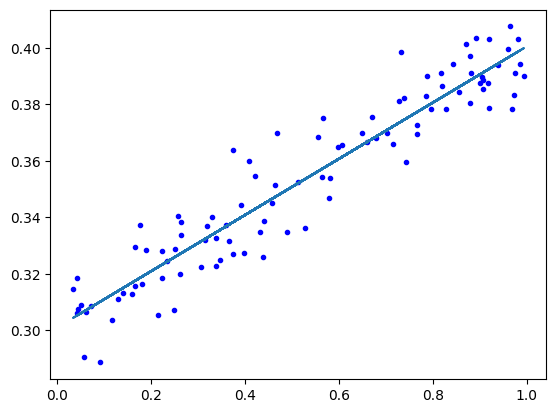

In [79]:
plt.plot(x_train, y_train[0], 'b.')
plt.plot(x_train, predict(x_train).detach().numpy())